##### 合成半透明圖片
這篇教學會如何使用 OpenCV 將一張半透明的圖片，與另外一張圖片進行合成，同樣的做法也可將透明背景的圖片貼到另外一張圖片上。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 兩張圖片進行半透明漸層合成 
準備兩張長寬尺寸相同的圖片 ( 如果不同可用 resize 或裁切方式轉換成相同尺寸 )，使用 for 迴圈，讀取水平方向從左而右的像素，\
根據位置的比例，混合該像素的顏色，就能做到半透明漸層合成的效果。

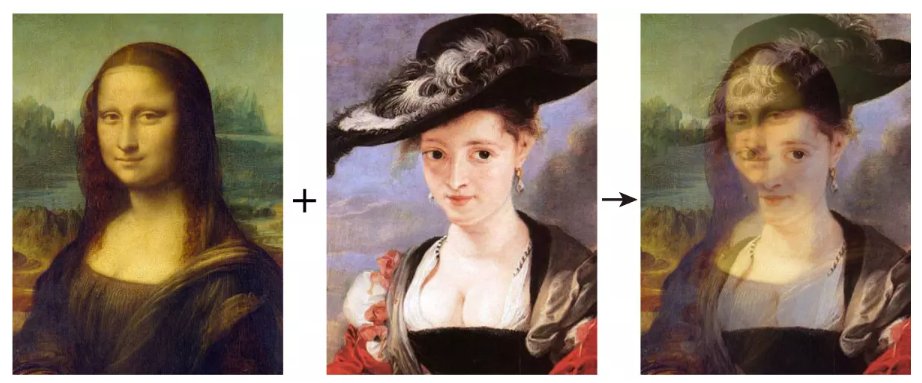

In [4]:
import cv2

# 讀取圖片
img1 = cv2.imread('meme_1.jpg')
img2 = cv2.imread('meme_2.png')

# 調整 img2 的大小與 img1 相同
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

for i in range(w):
    img1[:,i,0] = img1[:,i,0]*((236-i)/255) + img2[:,i,0]*(i/255)  # 藍色按照比例混合
    img1[:,i,1] = img1[:,i,1]*((236-i)/255) + img2[:,i,1]*(i/255)  # 紅色按照比例混合
    img1[:,i,2] = img1[:,i,2]*((236-i)/255) + img2[:,i,2]*(i/255)  # 綠色按照比例混合

# 儲存結果
cv2.imwrite('oxxostudio.png', img1)

# 顯示結果
show = img1.astype('float32')/255    # 如果要使用 imshow 必須要轉換類型
cv2.imshow('oxxostudio.png', show)

cv2.waitKey(0)       # 按下任意鍵停止
cv2.destroyAllWindows()

##### 貼上透明背景圖片 
如果要在某張圖片裡，貼上帶有透明背景的圖片 ( 例如 png )，可以透過透明背景圖片的 alpha 值，\
計算該像素是否要換成透明背景圖片的不透明部分，下方的程式碼會在蒙娜麗莎的圖片中間，貼上透明背景的 OpenCV logo。

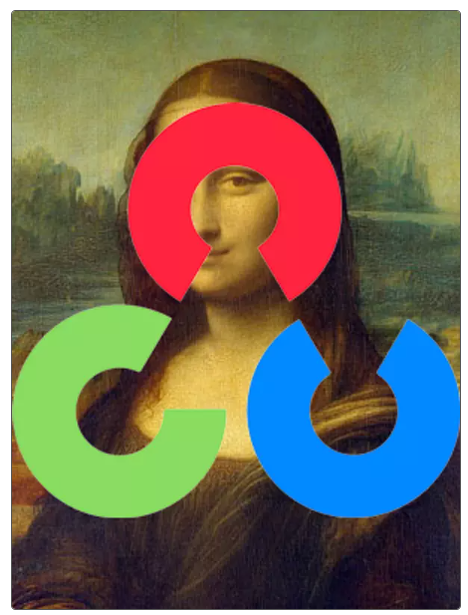

In [7]:
import cv2
import numpy as np

mona = cv2.imread('Dog.jpg')
logo = cv2.imread('meme_1.jpg', cv2.IMREAD_UNCHANGED)  # 使用 cv2.IMREAD_UNCHANGED 讀取 png，保留 alpha 色版

# 檢查 logo 是否有 alpha 通道
if logo.shape[2] == 4:
    alpha_channel = logo[:, :, 3]
else:
    # 如果沒有 alpha 通道，創建一個全白的 alpha 通道
    alpha_channel = 255 * np.ones(logo.shape[:2], dtype=logo.dtype)

mona_w = mona.shape[1]  # 蒙娜麗莎寬度
mona_h = mona.shape[0]  # 蒙娜麗莎高度
logo_w = logo.shape[1]  # logo 寬度
logo_h = logo.shape[0]  # logo 高度
dh = int((mona_h - logo_h) / 2)  # 如果 logo 要垂直置中，和上方的距離
h = dh + logo_h         # 計算蒙娜麗莎裡，logo 所在的高度位置

# 透過迴圈，根據背景透明度，計算出該像素的顏色
for i in range(logo_w):
    mona[dh:h,i,0] = mona[dh:h,i,0]*(1-alpha_channel[:,i]/255) + logo[:,i,0]*(alpha_channel[:,i]/255)
    mona[dh:h,i,1] = mona[dh:h,i,1]*(1-alpha_channel[:,i]/255) + logo[:,i,1]*(alpha_channel[:,i]/255)
    mona[dh:h,i,2] = mona[dh:h,i,2]*(1-alpha_channel[:,i]/255) + logo[:,i,2]*(alpha_channel[:,i]/255)

cv2.imwrite('oxxostudio.png', mona)

mona = mona.astype('float32')/255    # 如果要使用 imshow 必須要轉換類型
cv2.imshow('oxxostudio', mona)

cv2.waitKey(0)
cv2.destroyAllWindows()